## Dragon Real Estate Price Predictor

In [1]:
import pandas as pd

housing = pd.read_csv("housing.csv")

housing.shape


(506, 14)

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         500 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [4]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286462,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.706235,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [7]:
import numpy as np
#LEARNING
'''
def split_train_test(data, test_ratio):
    np.random.seed(41)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)    
    train_indices = shuffled[test_set_size:]
    test_indices = shuffled[:test_set_size]
    return data.iloc[train_indices] , data.iloc[test_indices]
''' 

'\ndef split_train_test(data, test_ratio):\n    np.random.seed(41)\n    shuffled = np.random.permutation(len(data))\n    print(shuffled)\n    test_set_size = int(len(data) * test_ratio)    \n    train_indices = shuffled[test_set_size:]\n    test_indices = shuffled[:test_set_size]\n    return data.iloc[train_indices] , data.iloc[test_indices]\n'

In [8]:
#train_set , test_set = split_train_test(housing, 0.2)

#print(f"Rows in Train Set {len(train_set)} \nRows in Test Set {len(test_set)}\n")


In [9]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(f"Rows in Train Set {len(train_set)} \nRows in Test Set {len(test_set)}\n")

Rows in Train Set 404 
Rows in Test Set 102



In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['chas']):
    strat_train_index = housing.loc[train_index]
    strat_test_index = housing.loc[test_index]
    



In [11]:
strat_test_index['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [12]:
strat_train_index['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [13]:
housing = strat_train_index.copy()

# # Looking for Correlations

In [14]:
corr_mat = housing.corr()
corr_mat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257808,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
zn,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292203,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
indus,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.382613,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
chas,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.099666,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
nox,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.299948,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
rm,-0.257808,0.292203,-0.382613,0.099666,-0.299948,1.000000,-0.242927,0.206540,-0.197933,-0.281059,-0.328054,0.122692,-0.603192,0.681045
age,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.242927,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
dis,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.206540,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
rad,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.197933,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
tax,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.281059,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238A11D5248>,
      dtype=object)

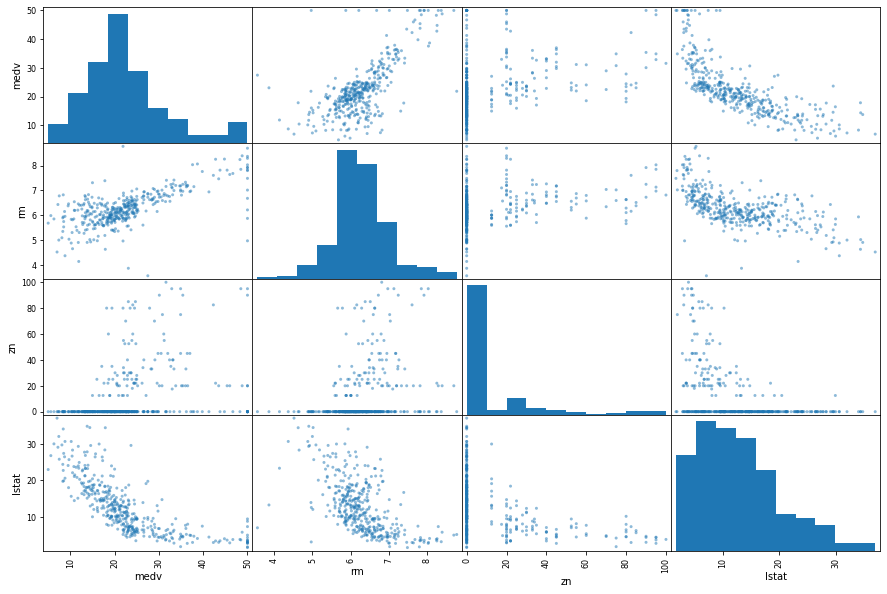

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['medv','rm','zn','lstat']
scatter_matrix(housing[attributes],figsize=(15,10))

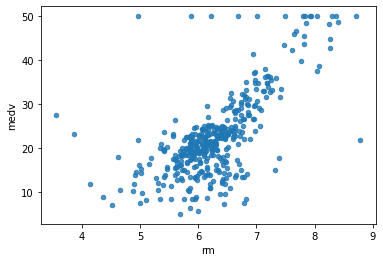

In [16]:
housing.plot(kind='scatter',x='rm',y='medv',alpha=0.8)

# # Trying out new attributes

In [17]:
housing['taxrm'] = housing['tax'] / housing['rm']
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [18]:
corr_mat = housing.corr()
corr_mat['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.681045
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.527653
lstat     -0.740494
Name: medv, dtype: float64

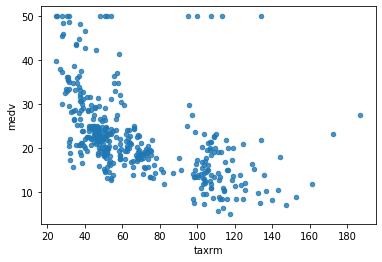

In [19]:
housing.plot(kind = 'scatter', x ='taxrm',y='medv',alpha=0.8)

In [20]:
housing = strat_train_index.drop('medv',axis = 1)
housing_labels = strat_train_index['medv'].copy()

# Missing Attribute

In [21]:
'''
Options:
    1. Get rid of missing data points.
    2. Get rid of that columns.
    3. Set the value to (0,mean,median)
    
'''

'\nOptions:\n    1. Get rid of missing data points.\n    2. Get rid of that columns.\n    3. Set the value to (0,mean,median)\n    \n'

In [22]:
median = housing['rm'].median()
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [23]:
housing.describe()  # Before imputing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281306,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716919,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [26]:
X = imputer.transform(housing)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [28]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280436,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712501,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit Learn

In [29]:
'''
Estimators
Transformers
Predictors
'''

'\nEstimators\nTransformers\nPredictors\n'

# Feature Scaling

In [30]:
'''
Primarily two features

1. Min-max scaling(Normalization)
    
    (value-min)/(max-min)
    MinMaxSacler()
2. Standardization
    (value-mean)/std
    
    Standard Scaler
'''

'\nPrimarily two features\n\n1. Min-max scaling(Normalization)\n    \n    (value-min)/(max-min)\n    MinMaxSacler()\n2. Standardization\n    (value-mean)/std\n    \n    Standard Scaler\n'

# Creating a Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler',StandardScaler())])



In [32]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

housing_num_tr.shape

(404, 13)

# Selecting a desired model for Dragon Real Estates

In [57]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

C:\Users\pRoJyot\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

prepared_data = my_pipeline.transform(some_data)

list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [59]:
model.predict(prepared_data)

array([22.08, 25.91, 16.55, 23.46, 23.47])

# Evaluating the model

In [60]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [61]:
rmse

1.3005232191561815

# Using better - Cross Validation 

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

C:\Users\pRoJyot\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [63]:
rmse_scores

array([4.12182484, 3.90227199, 3.71196703])

In [64]:
def print_scores(scores):
    print("Scores", scores)
    print("Mean : ",scores.mean())
    print("Std : ",scores.std())
    

In [65]:
print_scores(rmse_scores)

Scores [4.12182484 3.90227199 3.71196703]
Mean :  3.912021286442672
Std :  0.16746570161902588


# Saving the Model

In [66]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

# Testing the model

In [71]:
X_test = strat_test_index.drop('medv',axis = 1)
Y_test = strat_test_index['medv'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
rmse = np.sqrt(final_mse)

rmse

3.0898945029265454

In [72]:
print(final_predictions,list(Y_test))

[23.78 12.69 24.8  22.03 17.03 14.4  20.83 14.21 31.25 43.82 20.55 11.69
 25.54 24.58 19.31 11.51 31.4  14.05 23.68 19.14 18.96 18.68 17.71 22.26
 19.48 29.54 15.68 33.53  7.94 32.49 24.08 20.59 23.13 11.83 22.13 11.28
 41.96 24.63 23.28 39.44 24.48 28.23 20.43 21.14 20.38 34.16 43.   20.56
 19.31 22.75 21.61 14.79 21.48 14.79 23.77 32.37 42.59 29.37 19.81 20.48
 47.13  9.89 18.94 25.86 14.4  30.86 20.33 18.22 19.86 30.85 30.66 23.1
 20.9  21.56 33.9  12.25 15.6  20.09 20.69 21.55 21.97 21.36 14.29 23.63
 20.82 21.25 14.84 21.62 21.62 22.76 17.47 27.41  6.86 26.74 18.54 30.93
 21.61 32.56 14.62 27.47 22.39 22.04] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36